### Capstone project: 21 Skills Africa Data Science learning Path
    

**Objectives:**
Study the Boston real estate dataset below and answer the following questions:
    1. How does crime affect the price of real estate?
    2. Show the trend or nature of relationship between the house rates and the rest of the parameters
    3. Find the model suitable for predicting the price of a given house given the correlated variable
   

#### Dataset columns definations:

**CRIM** - Per capita crime ratio

**ZN** - Proportion of residential land zoned for lots of 25000sq ft

**INDUS** - Proportion of non-retail business acres per capita

**NOX** - N02 concentration in ppm

**RM** - Number of rooms per dwelling

**AGE** - Proportion of preoccupied units prior to 1940

**DIS** - Distance from Boston's employment centres

**RAD** - Index of accessibility to radial highways

**TAX** - Full value property tax per $10,000

**PTRATIO** - Pupil-Teacher ratio

**SEG** -  Proportion of segregated minorities

**LINC** - Proportion of lower income class

**MEDV** - Median value of homes


In [17]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
from sklearn.linear_model import PassiveAggressiveClassifier

df=pd.read_csv(r'C:\Users\User\Desktop\Machine Learning\Boston.csv')
#df = pd.read_xlsx(r"C:\Users\User\Desktop\python files\roy.xlsx.txt")
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


### Qn 1. How does crime affect the price of real estate?

For us to answer this question, we need to examine the trend between the '**CRIM**' and '**MEDV**' columns. 

We wish to compute their correlation co-efficient and also visualize their relationship using a scatter plot 

In [7]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [18]:
df['MEDV'].corr(df['CRIM'])

-0.3883046085868113

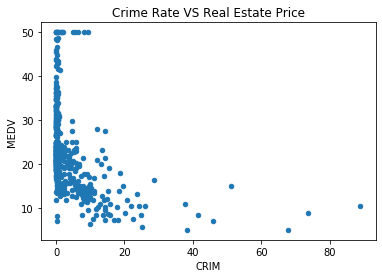

In [19]:
df.plot(kind= 'scatter',title='Crime Rate VS Real Estate Price', y='MEDV',x='CRIM')

plt.show()

**Remarks** : From the above observation, we can see a moderate negative correlation coefficient of **-0.3883** which shows that crime ratio
    
has a significant impact on the real estate prices. This means that houses located at areas which report low crime rates are highly priced in comparison

to houses located in high-crime areas.

### **Qn 2**. Show the trend or nature of relationship between the house rates and the rest of the parameters

In [10]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

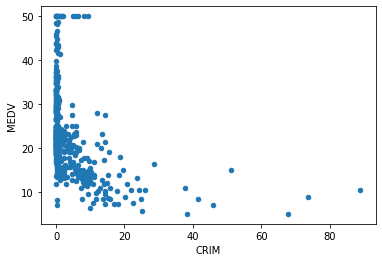

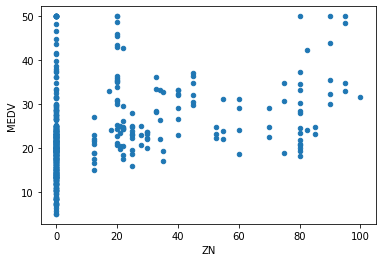

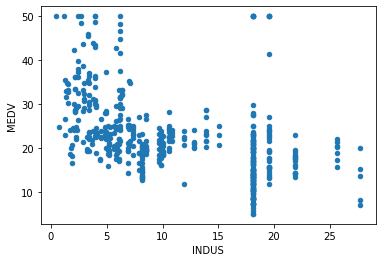

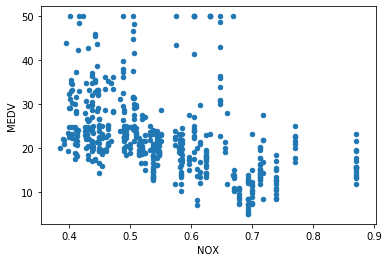

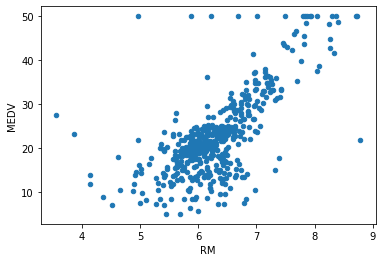

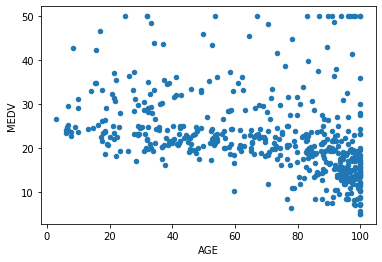

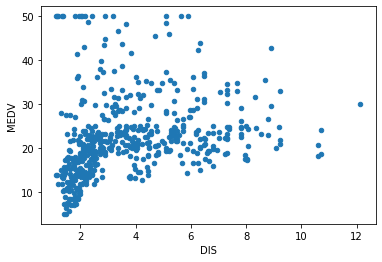

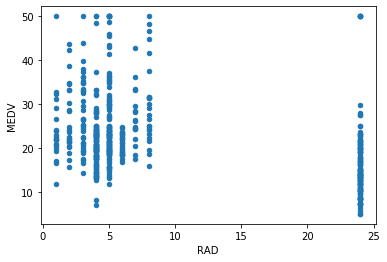

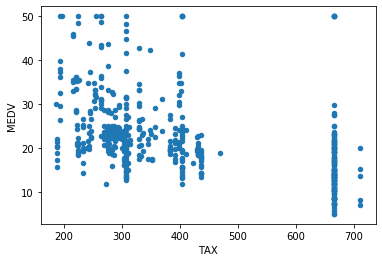

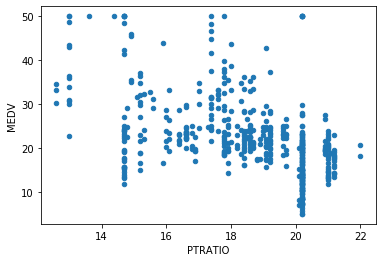

In [20]:
numcols=['CRIM','ZN','INDUS','NOX','RM','AGE','DIS', 'RAD', 'TAX',
       'PTRATIO']
for col in numcols:
    df.plot(kind= 'scatter', y='MEDV',x=col)
    plt.show()
    print('\n')

### Qn 3. Find the model suitable for predicting the price of a given house given the correlated variable

#### Tip 1: We first need to identify variables that are highly correlated to the price since they are the most suitable for our model

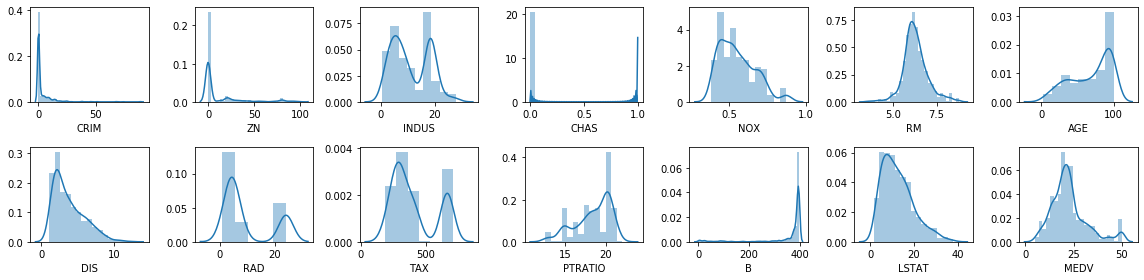

In [21]:

rows=2
columns=7
fig,ax = plt.subplots(nrows= rows, ncols=columns, figsize=(16,4))
col=df.columns
index = 0

for i in range(rows):
    for j in range(columns):
        sns.distplot(df[col[index]],ax =ax[i][j])
        index= index + 1
plt.tight_layout()

To get a better view of the features that greatly determine the value a house unit, we will need to create a heatmap visualizing 

the correlation matrix containing the person's correlation coefficient to help show how various variables relate.

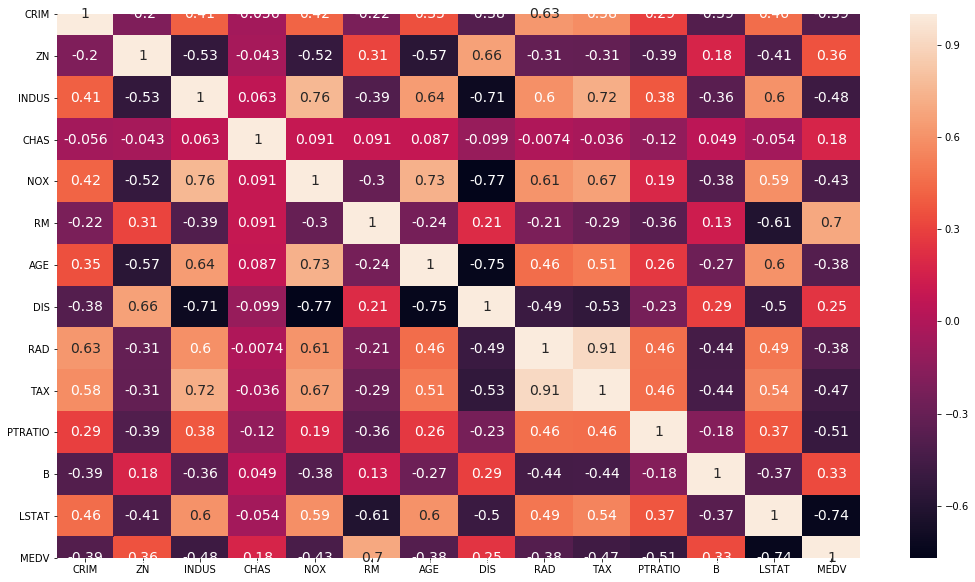

In [22]:
fig,ax =plt.subplots(figsize =(18,10))
sns.heatmap(df.corr(),annot =True,annot_kws={'size':14})

In [23]:
corrmat=df.corr()
def correlatedfeature(corrdata, threshold):
    feature=[]
    value=[]
    for i, index in enumerate(corrdata.index):
        if abs(corrdata[index])>threshold:
            feature.append(index)
            value.append(corrdata[index])
    df1 = pd.DataFrame(data=value, index=feature,columns=['Corr Value'])
    return df1

In [25]:
threshold=0.60
corr_values = correlatedfeature(corrmat['MEDV'],threshold)
corr_values

,Corr Value
RM,0.695360
LSTAT,-0.737663
MEDV,1.000000


In [26]:
correlated_data = df[corr_values.index]
X= correlated_data.drop(labels=['MEDV'],axis = 1)
y= correlated_data['MEDV']
X.head()

,RM,LSTAT
0,6.575,4.98
1,6.421,9.14
2,7.185,4.03
3,6.998,2.94
4,7.147,5.33


**Tip 2** : Now that we have identified **RM** and **LSTAT** to be more correlated to price with a correlation coefficient of >0.6
    
   we now need to split our data into **Train** and **Test** data for our model 

### Model Training

In [35]:
X=correlated_data.drop(labels=['MEDV'], axis=1)
y= correlated_data['MEDV']
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size = 0.2, random_state=0)


model=LinearRegression()
model.fit(X_train, y_train)

y_predict=model.predict(X_test)

model_df=pd.DataFrame(data = [y_predict, y_test])
model_df=model_df.T
model_df.columns=['y_predict', 'y_true']
model_df

,y_predict,y_true
0,26.285878,22.6
1,24.253779,50.0
2,24.420602,23.0
3,13.117541,8.3
4,22.495118,21.2
...,...,...
97,27.569601,24.7
98,20.199921,14.1
99,19.456057,18.7
100,25.164363,28.1


### Model Performance Evaluation

In [28]:

def performance_metric(y_true, y_predict):
    from sklearn.metrics import r2_score
    score = r2_score(y_test, y_predict)
    
    return score

In [36]:
score = performance_metric(model_df['y_true'], model_df['y_predict'])
print("Model has a coefficient of determination, R^2, of {:.3f}.".format(score))

Model has a coefficient of determination, R^2, of 0.541.


**Conclusion:** From the above model performance test we realize that the model has a +50% chance of predicting the price of a single unit correctly. However this is not the optimal perfprmance. 

we need to look at ways to improve the accuracy of the model. 